# Study day 1

### Data load & setting

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import mglearn

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [8]:
#붓꽃 품종 분류 데이터 load
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [9]:
#fearture 이름 확인
print("iris_data_set_feature_name: \n{}".format(iris_dataset['feature_names']))

iris_data_set_feature_name: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
#label 이름 확인
print("iris_data_set_target_name: \n{}".format(iris_dataset['target_names']))

iris_data_set_target_name: 
['setosa' 'versicolor' 'virginica']


In [11]:
#데이터 크기 확인
print("iris_data_set_size: \n{}".format(iris_dataset['data'].shape))

iris_data_set_size: 
(150, 4)


In [12]:
#head 5 줄 확인
print("iris_data_set_head5: \n{}".format(iris_dataset['data'][:5]))

iris_data_set_head5: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
#label 데이터 타입 확인
print("iris_data_set_type \n{}".format(type(iris_dataset['target'])))

iris_data_set_type 
<class 'numpy.ndarray'>


In [14]:
#test set, training set 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], test_size=0.3, random_state=0)

In [15]:
#나눠진 데이터 셋 확인
print("x_train_size: \n{}".format(X_train.shape))
print("y_train_size: \n{}".format(y_train.shape))

print("x_test_size: \n{}".format(X_test.shape))
print("y_test_size: \n{}".format(y_test.shape))

x_train_size: 
(105, 4)
y_train_size: 
(105,)
x_test_size: 
(45, 4)
y_test_size: 
(45,)


### EDA

In [16]:
#X_train으로 dataframe 만들기
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23dd5e50>,
      dtype=object)

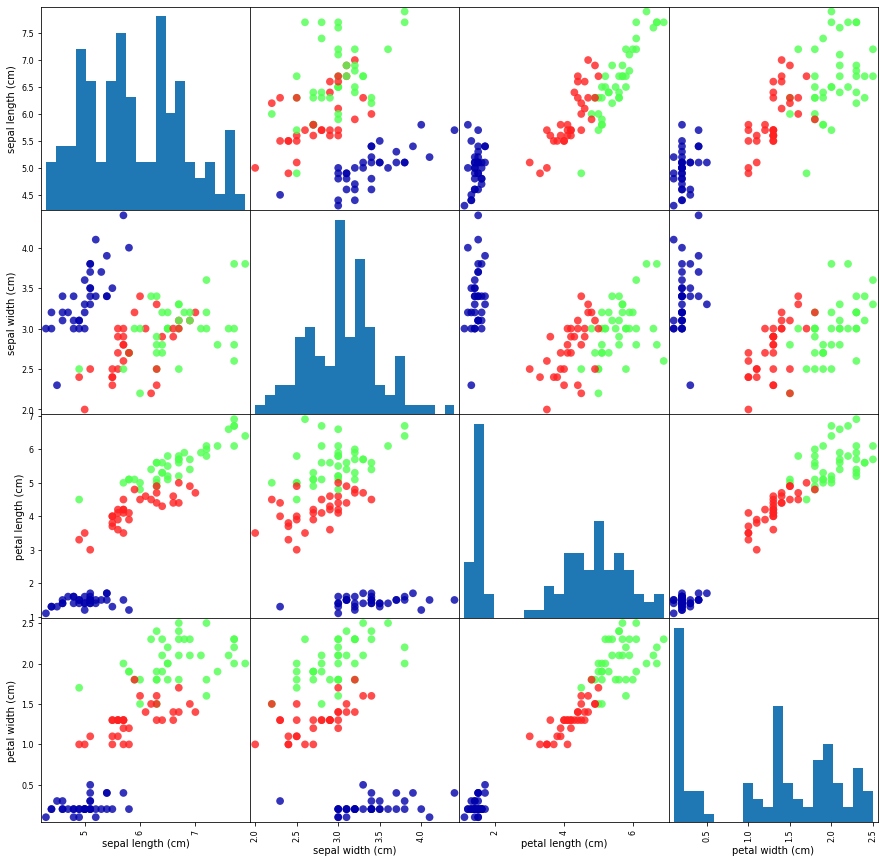

In [17]:
#xtrain 데이터의 ytrain별 색을 다르게 한 동그란 산점도 행렬 만들기
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize =(15,15), marker ='o', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

# Study day 2

### KNN

In [18]:
#KNN 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#K=1
knn=KNeighborsClassifier(n_neighbors=1)

In [20]:
#모델 피팅
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
#예측할 샘플만들기
X_new = np.array([[5,2.9,1,0.2]])

In [22]:
#prediction
knn_pred = knn.predict(X_new)
print(iris_dataset['target_names'][knn_pred])

['setosa']


In [23]:
#evaluation
y_pred=knn.predict(X_test)
print("pred_lables: \n{}".format(iris_dataset['target_names'][y_pred]))
print("pred_accuracy: \n{}".format(np.mean(y_pred == y_test)))

pred_lables: 
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']
pred_accuracy: 
0.9777777777777777


### Supervised learning

#### Data load

In [24]:
#맷플롯립 임포트
import matplotlib.pyplot as plt

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'second feature')

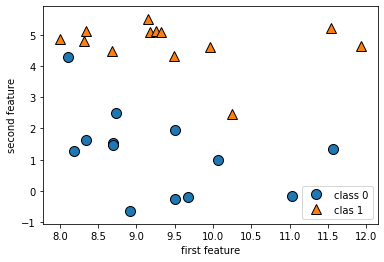

In [25]:
#data set 만들기
X, y = mglearn.datasets.make_forge()
#scatter plot
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "clas 1"], loc =4)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'target')

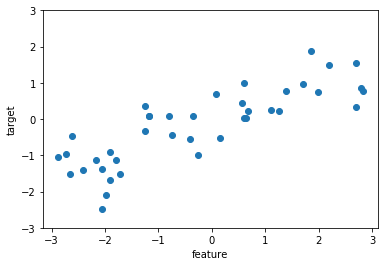

In [26]:
#data set 만들기 2
X, y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [27]:
# data set 가져오기 1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#클래스별 샘플 수 보기
print("the number of sample by class: \n{}".format({n: v for n , v in zip(cancer.target_names, np.bincount(cancer.target))}))

the number of sample by class: 
{'malignant': 212, 'benign': 357}


In [28]:
# data set 가져오기 2
from sklearn.datasets import load_boston
boston=load_boston()
X, y =mglearn.datasets.load_extended_boston()

#### KNN

In [29]:
from sklearn.datasets.samples_generator import make_blobs

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


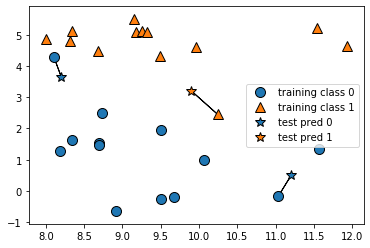

In [30]:
#knn 으로 예측하기 (k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


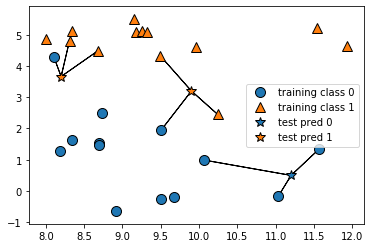

In [31]:
#knn 으로 예측하기 (k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [32]:
#test training set 나누기
X, y =mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [33]:
#classification
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
#prediction & evaluation
print("pred_lables: \n{}".format(clf.predict(X_test)))
print("pred_accuracy: \n{}".format(clf.score(X_test, y_test)))

pred_lables: 
[1 0 1 0 1 0 0]
pred_accuracy: 
0.8571428571428571


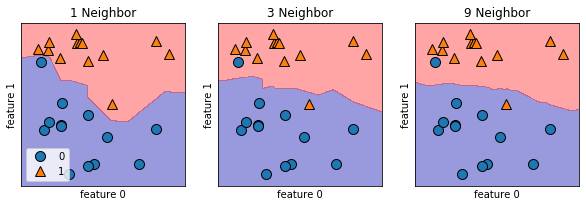

In [35]:
#K가 1, 3, 9 일때 차트로 그려서 classification 시각화
fig, axes = plt.subplots(1,3, figsize =(10,3))

for n_neighbors, ax in zip ([1,3,9], axes): 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

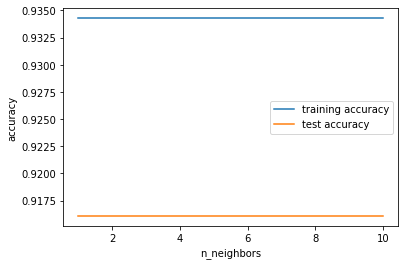

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11) #1~10 K 적용

for n_neghbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

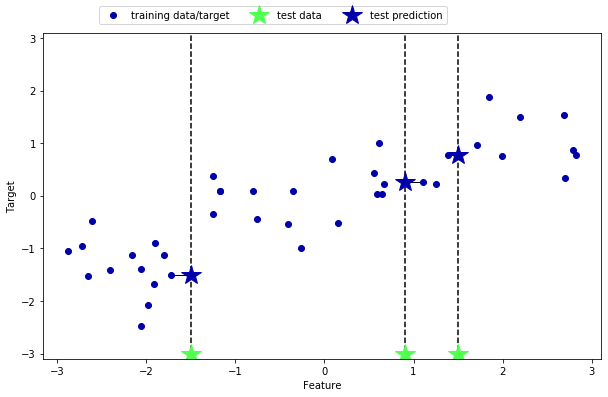

In [37]:
#knn regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

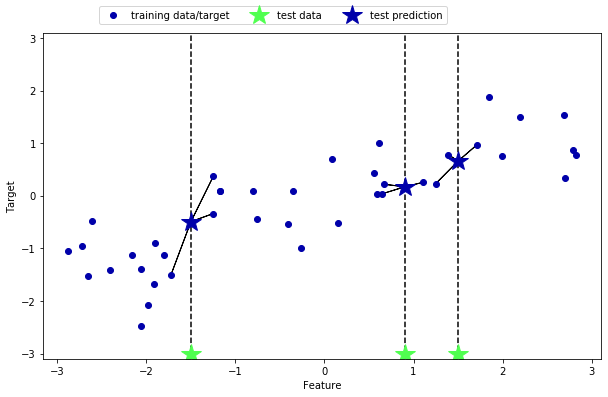

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
#wave data set
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [40]:
print("prediction: \n{}".format(reg.predict(X_test)))
print("test set r square: {:.2f}".format(reg.score(X_test, y_test)))

prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set r square: 0.83


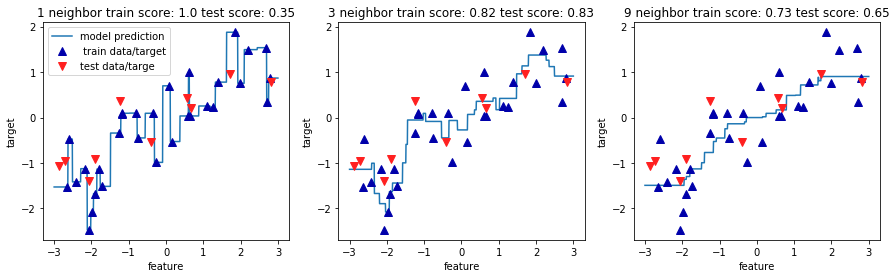

In [41]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize =8)
        ax.plot(X_test, y_test, 'v' , c=mglearn.cm2(1), markersize =8)
        
        ax.set_title(
            "{} neighbor train score: {:.2} test score: {:.2}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
        ax.set_xlabel("feature")
        ax.set_ylabel("target")
axes[0].legend(["model prediction"," train data/target","test data/targe"], loc="best") 
#K가 많을 수록 더 안정적 예측 기대 가능

#### Linear regression

w[0]: 0.393906  b: -0.031804


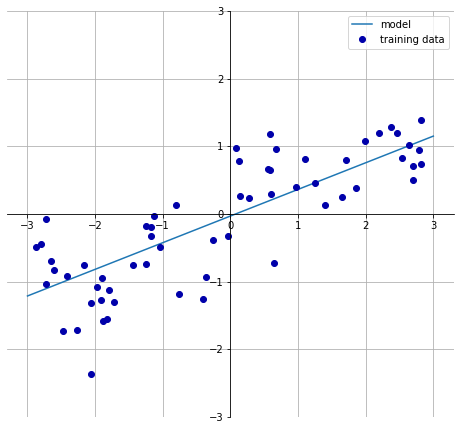

In [42]:
#linear model
mglearn.plots.plot_linear_regression_wave()

In [43]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

lr=LinearRegression().fit(X_train,y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test))) #training set 과  test set score가 매우 비슷한 것은 과소적합 상태일 수 있음

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746
train set score: 0.67
test set score: 0.66


In [44]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test))) #training set이 월등히 높은 경우 과대 적합 생태

train set score: 0.95
test set score: 0.61


#### Ridge regression 

In [45]:
from sklearn.linear_model import Ridge #릿지도 선형 모델, L2 규제 노름제곱 페널티 적용

ridge = Ridge().fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [46]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test))) #alpha값을 높이면 계수를 0에 가깝게 하여 일반화에 도움이 된다

train set score: 0.79
test set score: 0.64


In [47]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test))) #alpha값을 높이면 계수를 0에 가깝게 하여 일반화에 도움이 된다

train set score: 0.93
test set score: 0.77


/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backend

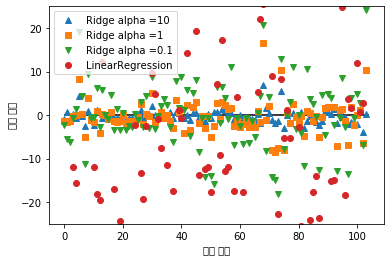

In [48]:
#alpha 값에 따라 codfficient가 어떻게 달라지는지 시각화 (알파가 클 수록 코이피션트의 절댓값의 크기가 작아진다)
plt.plot(ridge10.coef_, '^', label ="Ridge alpha =10")
plt.plot(ridge.coef_, 's', label ="Ridge alpha =1")
plt.plot(ridge01.coef_, 'v', label ="Ridge alpha =0.1")

plt.plot(lr.coef_, 'o', label ="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

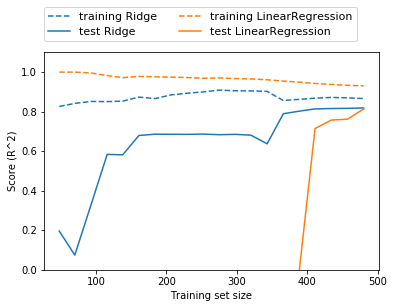

In [49]:
#Learning curve: data set 크기에 따른 모델 성능 변화를 나타낸 그래프 
mglearn.plots.plot_ridge_n_samples()
#traing set score는 Linear가 어떤 data set 크기여도 더 높음 하지만 test set score는 ridge가 더 높음

#### Lasso

In [50]:
# linear 중 ridge 대안인 lasso, ridge와 마찬가지로  계수를 0에 가깝게 만든다. L1 규제로 완전히 0이 되는 계수도 생김 이러면 완전히 제외되는 특성이 됨->모델 이해가 쉬워짐
#보통은 릿지를 선호하나 많은 계수 중 추려내야 할때 라소를 씀
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.29
test set score: 0.21
number of features: 4.00


In [51]:
#Lasso 계수를 0으로 얼마나 강하게 보낼지 조정하는 alpha  매개 변수 (릿지와 마찬가지) 조정
lasso001 = Lasso(alpha = 0.01, max_iter =100000).fit(X_train, y_train) # max_iter 적으면 늘리라고 경고가 나온다
print("training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso001.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.90
test set score: 0.77
number of features: 33.00


In [52]:
#Lasso 계수를 0으로 얼마나 강하게 보낼지 조정하는 alpha  매개 변수 (릿지와 마찬가지) 조정
lasso00001 = Lasso(alpha = 0.0001, max_iter =100000).fit(X_train, y_train) # max_iter 적으면 늘리라고 경고가 나온다
print("training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("number of features: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))#영향력 0이 아닌, 104개 중 4개

training set score: 0.95
test set score: 0.64
number of features: 96.00


/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backend

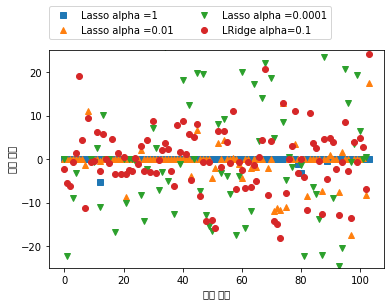

In [53]:
#alpha 값에 따라 codfficient가 어떻게 달라지는지 시각화 (알파가 클 수록 코이피션트의 절댓값의 크기가 작아진다)
plt.plot(lasso.coef_, 's', label ="Lasso alpha =1")
plt.plot(lasso001.coef_, '^', label ="Lasso alpha =0.01")
plt.plot(lasso00001.coef_, 'v', label ="Lasso alpha =0.0001")

plt.plot(ridge01.coef_, 'o', label ="LRidge alpha=0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

#### Logistic regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


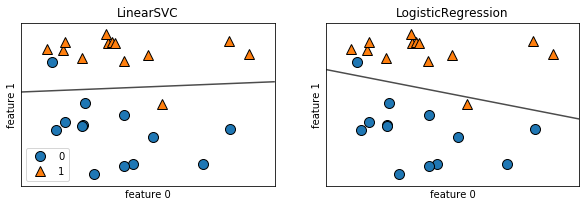

In [54]:
#Logistic regression -분류
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, 
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

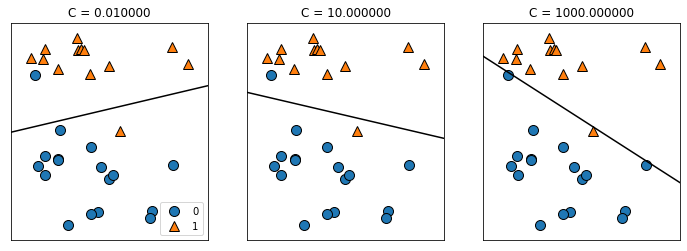

In [55]:
#규제 강도 매개변수 C, C값이 높아지면 규제가 감소하며 훈련세트에 최대한 맞추게 된다(오버피팅), C값이 낮아지면 계수벡터(w)가 0에 가까워진다
mglearn.plots.plot_linear_svc_regularization()

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg.score(X_test,y_test)))

training set score:0.946
test set score:0.965


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)#C를 통해 제약을 풀어줌 -> 정확도가 조금 올라감. 복잡도가 높은 모델일수록 성능이 좋음
print("training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

training set score:0.948
test set score:0.958


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)#C를 통해 제약을 강화함
print("training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

training set score:0.951
test set score:0.944


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


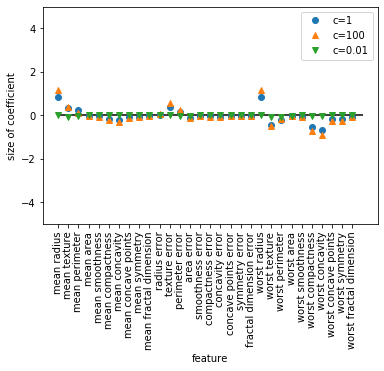

In [59]:
plt.plot(logreg.coef_.T, 'o', label ="c=1")
plt.plot(logreg100.coef_.T, '^', label ="c=100")
plt.plot(logreg001.coef_.T, 'v', label ="c=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation =90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("size of coefficient")
plt.legend()

C=0.001인 l1 logistic regression training accuracy: 0.95
C=0.001인 l1 logistic regression test accuracy: 0.94
C=1.000인 l1 logistic regression training accuracy: 0.95
C=1.000인 l1 logistic regression test accuracy: 0.97
C=100.000인 l1 logistic regression training accuracy: 0.95
C=100.000인 l1 logistic regression test accuracy: 0.96


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

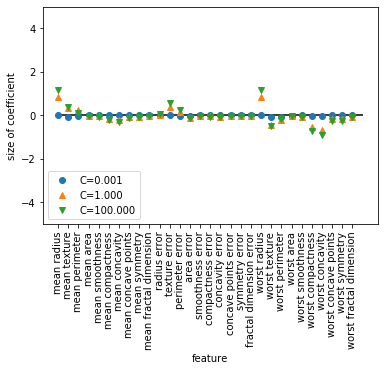

In [60]:
#92pg
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
        lr_l1 = LogisticRegression(C=C, penalty ="l2").fit(X_train, y_train)
        print("C={:.3f}인 l1 logistic regression training accuracy: {:.2}".format(
            C, lr_l1.score(X_train, y_train)))
        print("C={:.3f}인 l1 logistic regression test accuracy: {:.2}".format(
            C, lr_l1.score(X_test, y_test)))
        plt.plot(lr_l1.coef_.T, marker, label ="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("size of coefficient")

plt.ylim(-5,5)
plt.legend(loc=3)

#### multi - class classification

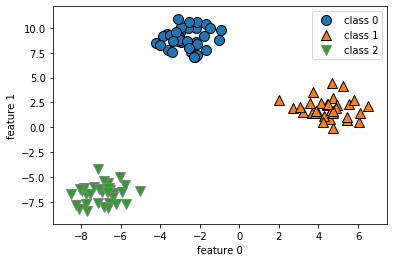

In [61]:
#data set 만들기
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0","class 1", "class 2"])

In [62]:
#Linear support vector machine
linear_svm=LinearSVC().fit(X,y)
print("coefficient size: ", linear_svm.coef_.shape)
print("intercept size: ", linear_svm.intercept_.shape)

coefficient size:  (3, 2)
intercept size:  (3,)


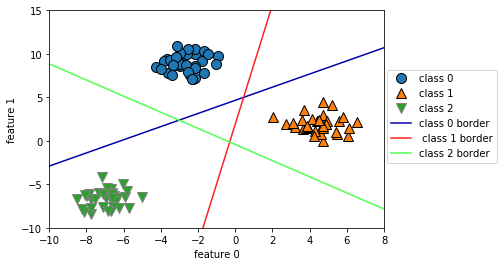

In [63]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class 0 border',' class 1 border','class 2 border'], loc=(1.01,0.3))

Text(0, 0.5, 'feature 1')

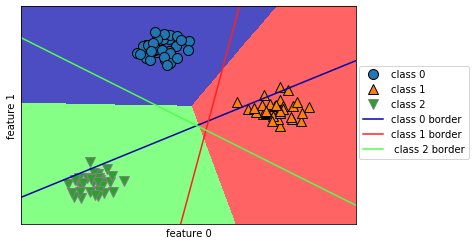

In [64]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, inetercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2','class 0 border','class 1 border',' class 2 border'], loc=(1.01,0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
#alpha 값이 클수록, C 값이 작을 수록 모델이 단순해진다. log scale 로 정한다 보통 10배씩 0.01, 0.1, 1, 10 ... 
#그리고 규제를 L1(중요한게 특성이 별로 없으면), L2(보통 많이 씀) 중 뭘 쓸지 정해야 함
#데이터 샘플이 많으면 logistic regression 과 ridge에 solver ='sag' 옵션을 줘야함. 확률적 평균 경사 하강법. 이저에 구한 모든 경사의 평균을 사용하여 계수 갱신하는 법
#다른 대안으로 SGDClassifier 와 SGDRegressor를 사용하면 됨

#### naive bayes classification

In [65]:
#Bernoulli NB 분류기는 각 클래스의 feature 중 0이 아닌 것이 몇개 인지 센다.
#bernoulli와 multinominal은 희소한 데이터 카운트에 이용 multinominal NB 는 0이 아닌 특성이 비교적 많은 (큰 문서에서 단어 발현 수) bernoulli보다 성능이 좋음
#gaussian NB는 매우 고차원 데이터 셋에 이용
#학습시간이 너무 오래 걸릴 경우 나이브 베이즈를 쓰면 된다. 희소한 고차원 데이터에서 잘 작동함
counts= {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature count:\n{}".format(counts))

feature count:
{0: array([-90.70533329, 303.81586344]), 1: array([148.48383017,  63.98436414]), 2: array([-229.40641734, -220.31515084])}


#### decision tree

In [66]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
#과대적합 피하기
#사전 가지치기 pre_pruning 트리 생성을 일찍 중단하는 전략 > 최대 깊이나 리프의 최대개수를 제한, 노드가 분할하기 위한 포인트의 최소개수 지정 등 (사이킷런은 이것만 지원)
##max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 해도 과대적합을 막을 수 있다.
#사후 가지치기 pro_pruning 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("taininig set score: {:.3}".format(tree.score(X_train, y_train))) #훈련데이터 레이블 완벽 기억만큼 충분히 깊게 만듬
print("test set score: {:.3}".format(tree.score(X_test, y_test)))

taininig set score: 1.0
test set score: 0.902


In [68]:
#max_depth =4  연속 질문 최대 4개로 제한
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("taininig set score: {:.3}".format(tree.score(X_train, y_train))) #훈련데이터 레이블 완벽 기억만큼 충분히 깊게 만듬
print("test set score: {:.3}".format(tree.score(X_test, y_test)))

taininig set score: 0.986
test set score: 0.909


In [69]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

In [71]:
print("feature importance:\n{}".format(tree.feature_importances_))

feature importance:
[0.         0.01558601 0.         0.         0.         0.
 0.         0.         0.01150064 0.         0.00253726 0.
 0.01023272 0.01043016 0.         0.         0.         0.
 0.         0.         0.03848579 0.03087626 0.75708572 0.
 0.         0.         0.00418952 0.10976588 0.         0.00931004]


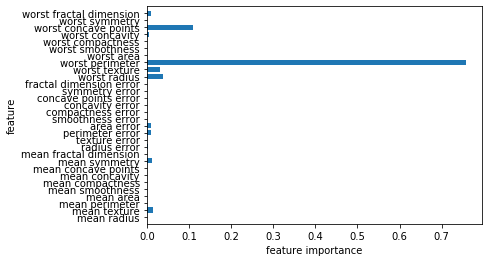

In [72]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

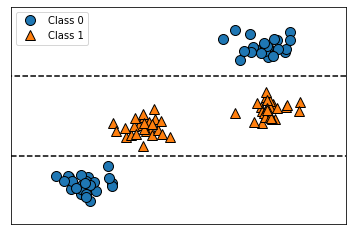

In [73]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'price ($/Mbyte_')

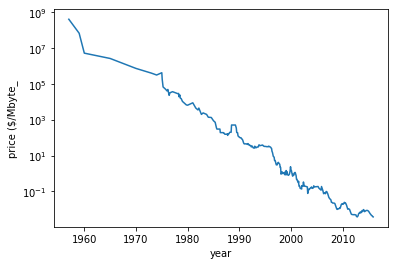

In [77]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte_")

In [89]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

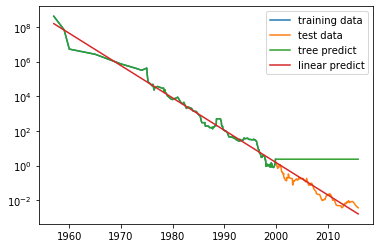

In [90]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="linear predict")
plt.legend()

### ensemble tree 

#### random forest

In [91]:
#randomforest는 과대적합을 피할 수 있다. 훨씬 좋은 결정 경계를 만들어준다. 랜덤하기 때문에 random state 고정 안시키면 매우 다른 모델이 나올 수 있다 (트리가 많을수록 덜함)
#tree의 개수를 정해야 한다.(n_estimators 매개변수) 각 트리는 독립적으여야 하여 무작위 데이터 선택하여 고유하게 트리를 만듬
#bootstrap sample (n_samples 중 무작위로 n_samples 만큼 반복 추출)
#몇개의 특성을 고를지는 max_features 매개변수로 조정. n_features로 정하면 모든 특성 고려, 특성 선택의 무작위성이 들어가지 않음. (샘플링 무작위는 유지)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

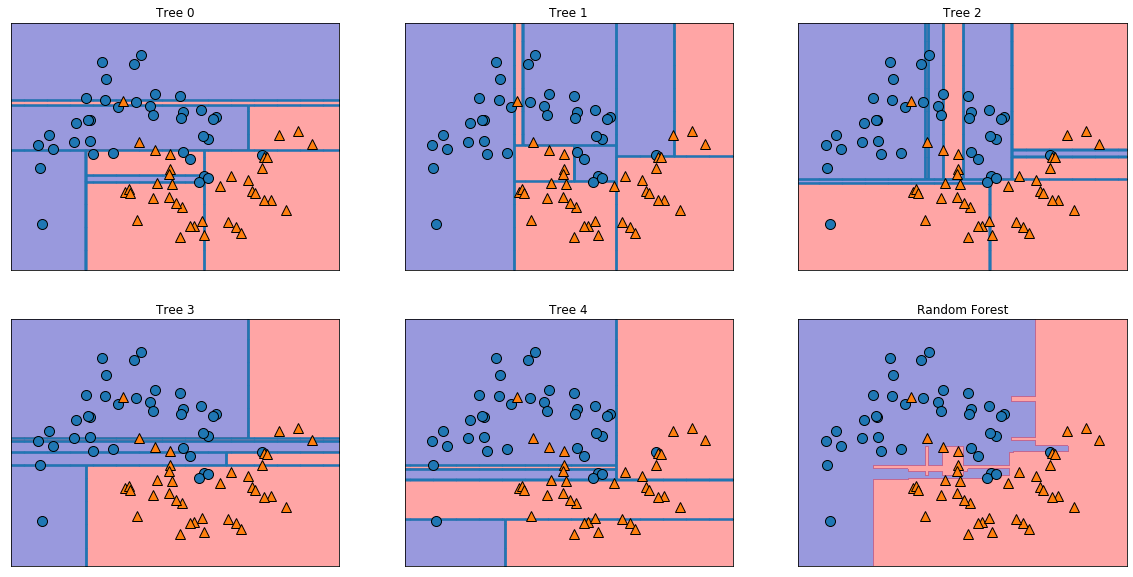

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


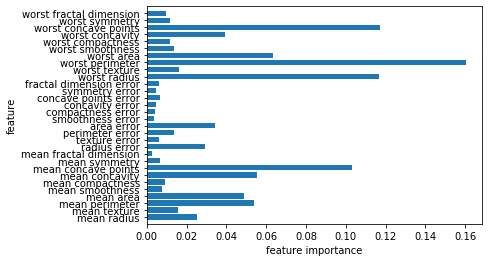

In [94]:
plot_feature_importances_cancer(forest)
#단일 트리보다 더 많은 특성이 0 이상의 중요도를 갖게 됨

#### gradient boosting

In [95]:
#회귀, 분류 둘 다 가능함. 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬. 무작위성이 없음.
#강력 사전 가지치기를 함. 
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
#100이 나와서 과대적합 의심, 트리 최대깊이를 줄여야 함

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [96]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [97]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


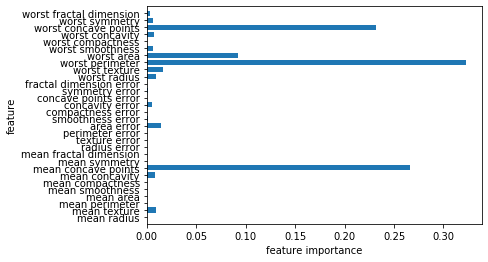

In [98]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### Kernelized Support Vector Machines

Text(0, 0.5, 'Feature 1')

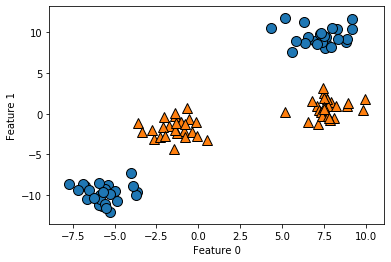

In [99]:
#Linear Models and Non-linear Features
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

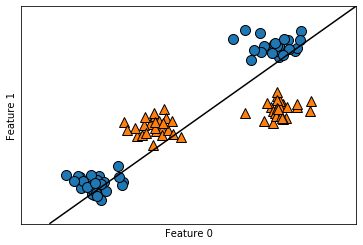

In [100]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

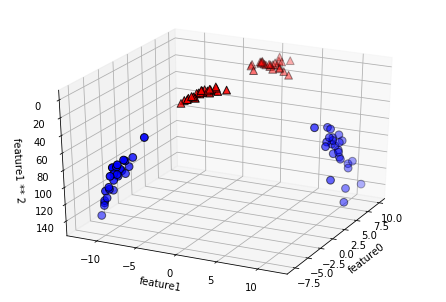

In [101]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

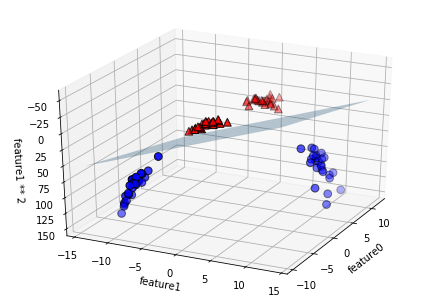

In [102]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

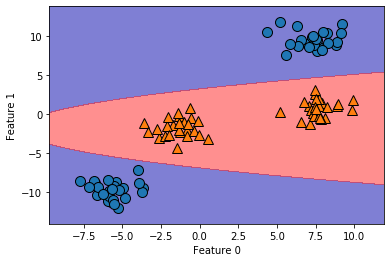

In [103]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### The Kernel Trick

Text(0, 0.5, 'Feature 1')

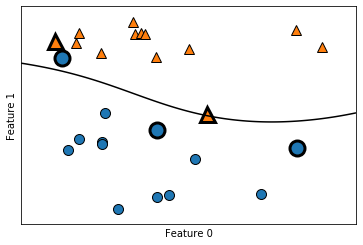

In [104]:
## Support vector machine
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

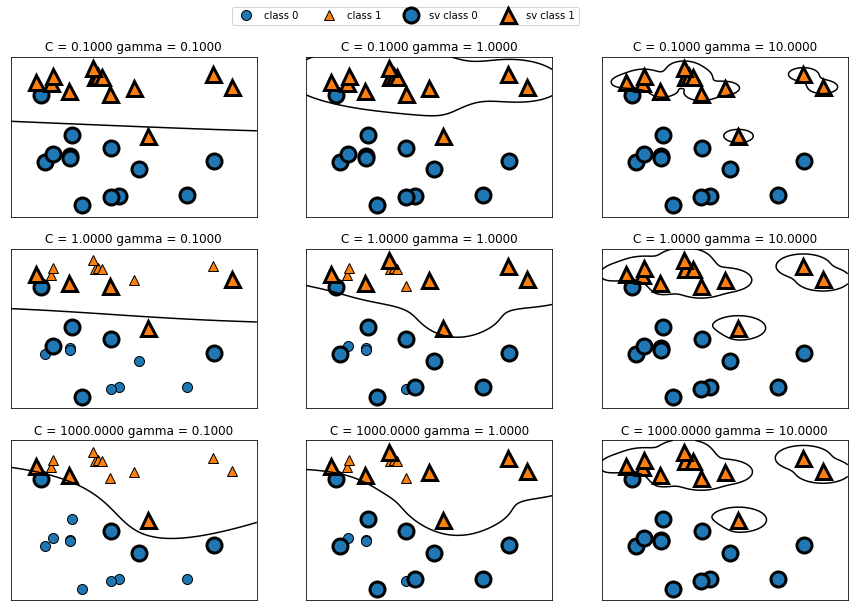

In [105]:
#parameter tuning
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

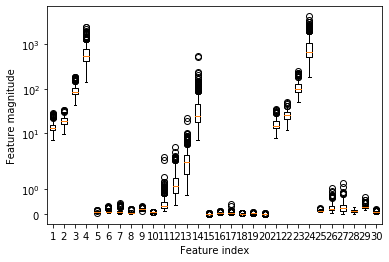

In [108]:
plt.boxplot(X_train) #, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [109]:
#data processing
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [110]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [111]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [112]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958
